In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Modelling
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

#Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report

import os

In [2]:
df = pd.read_csv('../input/telecom-churn-case-study-hackathon-38/train (1).csv')

In [3]:
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,69999.0,34999.000000,20207.115084,0.0,17499.5,34999.0,52498.5,69998.00
circle_id,69999.0,109.000000,0.000000,109.0,109.0,109.0,109.0,109.00
loc_og_t2o_mou,69297.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00
std_og_t2o_mou,69297.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00
loc_ic_t2o_mou,69297.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...
aon,69999.0,1220.639709,952.426321,180.0,468.0,868.0,1813.0,4337.00
aug_vbc_3g,69999.0,68.108597,269.328659,0.0,0.0,0.0,0.0,12916.22
jul_vbc_3g,69999.0,65.935830,267.899034,0.0,0.0,0.0,0.0,9165.60
jun_vbc_3g,69999.0,60.076740,257.226810,0.0,0.0,0.0,0.0,11166.21


In [6]:
df.shape

(69999, 172)

In [7]:
df.isnull().sum()

id                     0
circle_id              0
loc_og_t2o_mou       702
std_og_t2o_mou       702
loc_ic_t2o_mou       702
                    ... 
aon                    0
aug_vbc_3g             0
jul_vbc_3g             0
jun_vbc_3g             0
churn_probability      0
Length: 172, dtype: int64

In [8]:
percent_null = df.isnull().sum().sum() / np.product(df.shape) * 100
percent_null

15.241795813029887

In [9]:
colls = []
for col in df.columns:
    null_col = df[col].isnull().sum() / df.shape[0] * 100
    if null_col>50:
        colls+=[col]
    print("{} : {:.2f}".format(col,null_col))

id : 0.00
circle_id : 0.00
loc_og_t2o_mou : 1.00
std_og_t2o_mou : 1.00
loc_ic_t2o_mou : 1.00
last_date_of_month_6 : 0.00
last_date_of_month_7 : 0.57
last_date_of_month_8 : 1.05
arpu_6 : 0.00
arpu_7 : 0.00
arpu_8 : 0.00
onnet_mou_6 : 3.95
onnet_mou_7 : 3.84
onnet_mou_8 : 5.29
offnet_mou_6 : 3.95
offnet_mou_7 : 3.84
offnet_mou_8 : 5.29
roam_ic_mou_6 : 3.95
roam_ic_mou_7 : 3.84
roam_ic_mou_8 : 5.29
roam_og_mou_6 : 3.95
roam_og_mou_7 : 3.84
roam_og_mou_8 : 5.29
loc_og_t2t_mou_6 : 3.95
loc_og_t2t_mou_7 : 3.84
loc_og_t2t_mou_8 : 5.29
loc_og_t2m_mou_6 : 3.95
loc_og_t2m_mou_7 : 3.84
loc_og_t2m_mou_8 : 5.29
loc_og_t2f_mou_6 : 3.95
loc_og_t2f_mou_7 : 3.84
loc_og_t2f_mou_8 : 5.29
loc_og_t2c_mou_6 : 3.95
loc_og_t2c_mou_7 : 3.84
loc_og_t2c_mou_8 : 5.29
loc_og_mou_6 : 3.95
loc_og_mou_7 : 3.84
loc_og_mou_8 : 5.29
std_og_t2t_mou_6 : 3.95
std_og_t2t_mou_7 : 3.84
std_og_t2t_mou_8 : 5.29
std_og_t2m_mou_6 : 3.95
std_og_t2m_mou_7 : 3.84
std_og_t2m_mou_8 : 5.29
std_og_t2f_mou_6 : 3.95
std_og_t2f_mou_7 : 3.8

In [10]:
colls

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

In [11]:
df = df.drop(colls,axis=1)

In [12]:
percent_null = df.isnull().sum().sum() / np.product(df.shape) * 100
percent_null

2.752715380843469

In [13]:
df = df.dropna()

In [14]:
df.isnull().sum().sum()

0

In [15]:
colls = []
for col in df.columns:
    if df[col].dtype == object:
        colls+=[col]
        print(col)

last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
date_of_last_rech_6
date_of_last_rech_7
date_of_last_rech_8


In [16]:
df[colls]

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,6/30/2014,7/31/2014,8/31/2014,6/22/2014,7/10/2014,8/24/2014
1,6/30/2014,7/31/2014,8/31/2014,6/12/2014,7/10/2014,8/26/2014
2,6/30/2014,7/31/2014,8/31/2014,6/11/2014,7/22/2014,8/24/2014
3,6/30/2014,7/31/2014,8/31/2014,6/15/2014,7/21/2014,8/25/2014
4,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/26/2014,8/30/2014
...,...,...,...,...,...,...
69994,6/30/2014,7/31/2014,8/31/2014,6/18/2014,7/31/2014,8/31/2014
69995,6/30/2014,7/31/2014,8/31/2014,6/28/2014,7/31/2014,8/27/2014
69996,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/30/2014,8/29/2014
69997,6/30/2014,7/31/2014,8/31/2014,6/29/2014,7/19/2014,8/26/2014


In [17]:
df = df.drop(colls,axis=1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61895 entries, 0 to 69998
Columns: 136 entries, id to churn_probability
dtypes: float64(108), int64(28)
memory usage: 64.7 MB


In [19]:
colls = []
for col in df.columns:
    if df[col].nunique() ==1:
        colls+=[col]
    print('{} : {}'.format(col,df[col].nunique()))

id : 61895
circle_id : 1
loc_og_t2o_mou : 1
std_og_t2o_mou : 1
loc_ic_t2o_mou : 1
arpu_6 : 56883
arpu_7 : 57024
arpu_8 : 56641
onnet_mou_6 : 19241
onnet_mou_7 : 19502
onnet_mou_8 : 19094
offnet_mou_6 : 25312
offnet_mou_7 : 25458
offnet_mou_8 : 25294
roam_ic_mou_6 : 5068
roam_ic_mou_7 : 4062
roam_ic_mou_8 : 4121
roam_og_mou_6 : 6168
roam_og_mou_7 : 4992
roam_og_mou_8 : 5017
loc_og_t2t_mou_6 : 11190
loc_og_t2t_mou_7 : 11190
loc_og_t2t_mou_8 : 11137
loc_og_t2m_mou_6 : 17378
loc_og_t2m_mou_7 : 17362
loc_og_t2m_mou_8 : 17401
loc_og_t2f_mou_6 : 3279
loc_og_t2f_mou_7 : 3290
loc_og_t2f_mou_8 : 3247
loc_og_t2c_mou_6 : 1894
loc_og_t2c_mou_7 : 2049
loc_og_t2c_mou_8 : 2152
loc_og_mou_6 : 21684
loc_og_mou_7 : 21655
loc_og_mou_8 : 21622
std_og_t2t_mou_6 : 13733
std_og_t2t_mou_7 : 14102
std_og_t2t_mou_8 : 13812
std_og_t2m_mou_6 : 15227
std_og_t2m_mou_7 : 15573
std_og_t2m_mou_8 : 15237
std_og_t2f_mou_6 : 1985
std_og_t2f_mou_7 : 1910
std_og_t2f_mou_8 : 1873
std_og_t2c_mou_6 : 1
std_og_t2c_mou_7 : 1
std

In [20]:
df[colls]

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8
0,109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
69994,109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69995,109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df = df.drop(colls,axis=1)

In [22]:
df.duplicated().sum()

0

In [23]:
colls = []
for col in df.columns:
    if df[col].nunique() <20:
        colls+=[col]
        print('{} : {}'.format(col,df[col].nunique()))

monthly_2g_6 : 5
monthly_2g_7 : 6
monthly_2g_8 : 6
monthly_3g_6 : 10
monthly_3g_7 : 13
monthly_3g_8 : 12
churn_probability : 2


In [24]:
def category_counts(col):
    plt.figure(figsize=(12,8));
    sns.countplot(x=df[col],palette='RdYlGn');
    plt.xlabel(col);
    plt.ylabel('Counts');
    plt.title(f"{col} Value Counts");
    plt.show()

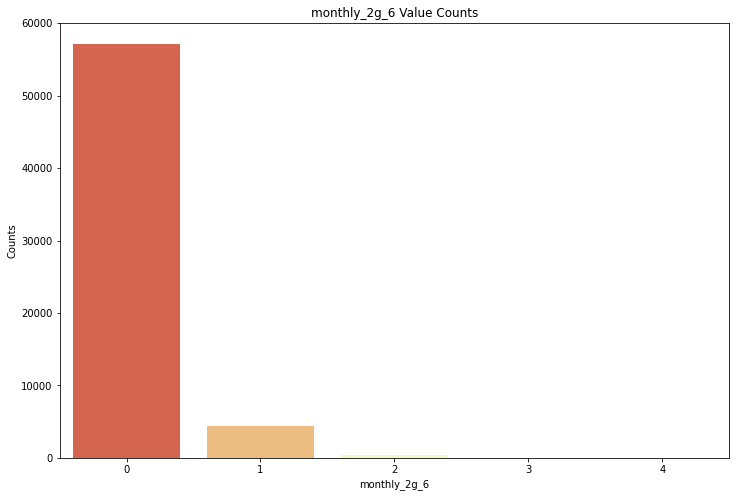

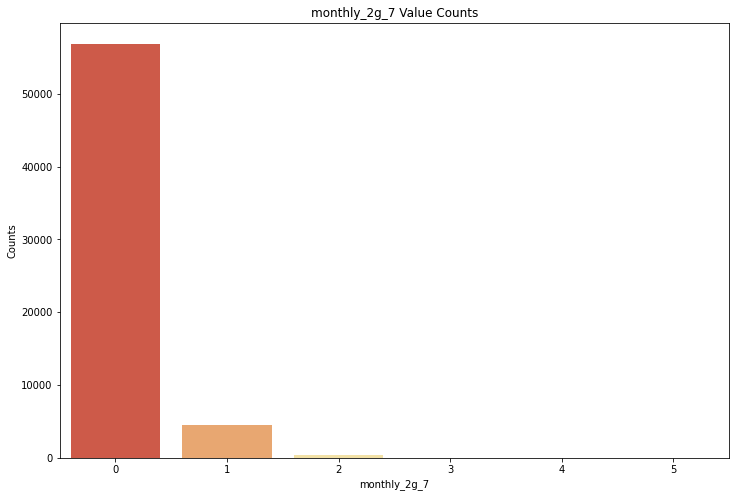

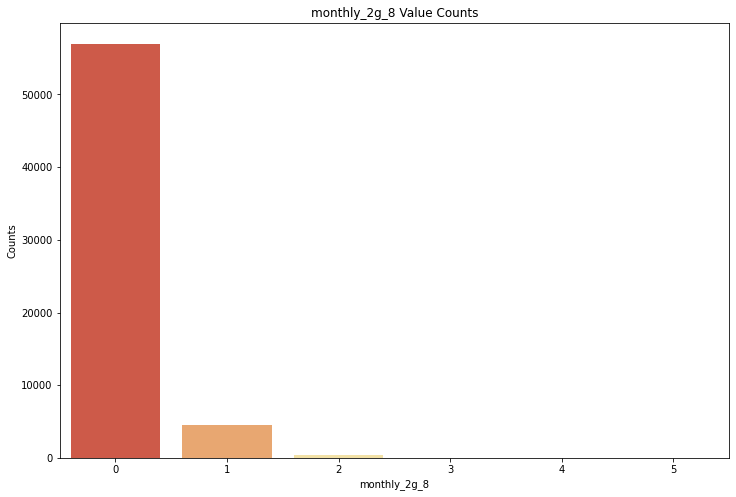

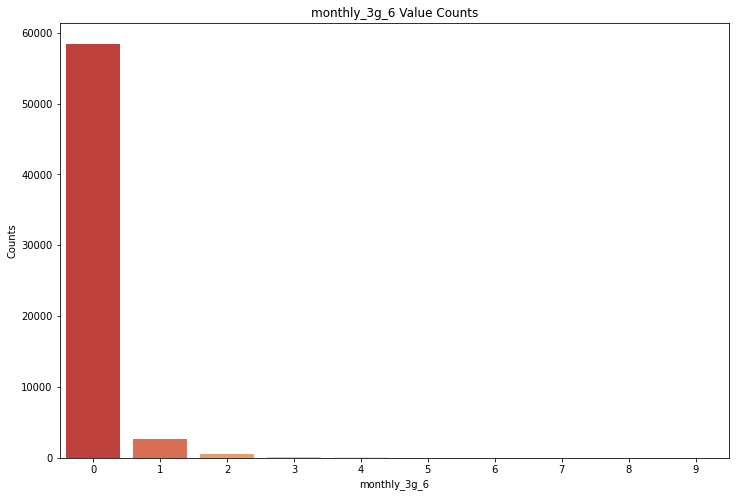

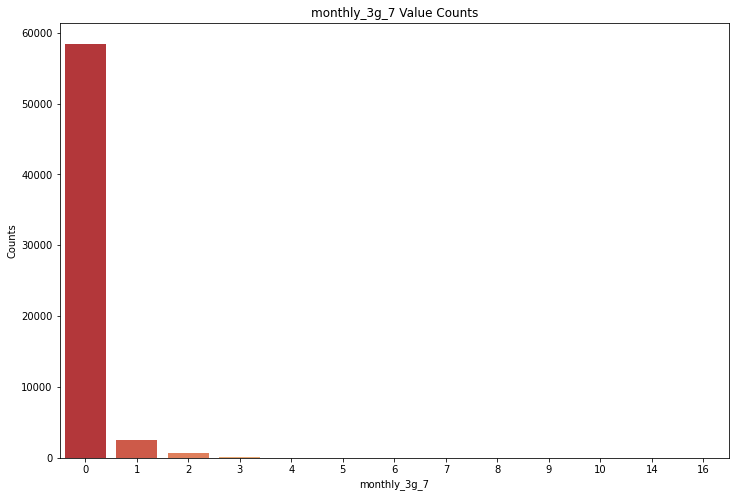

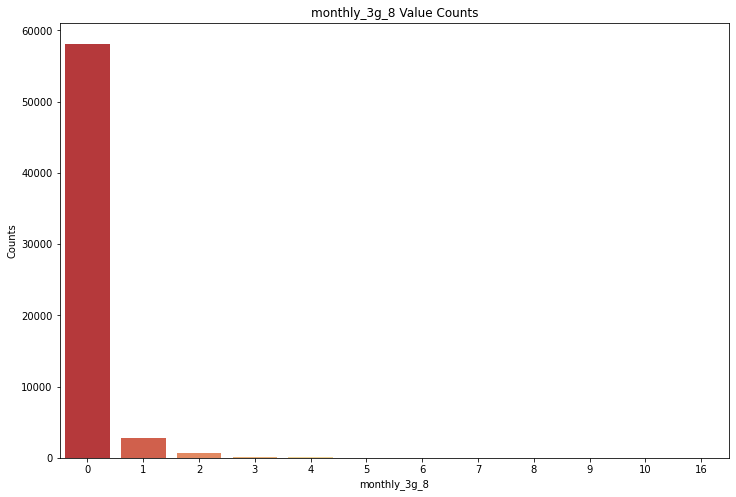

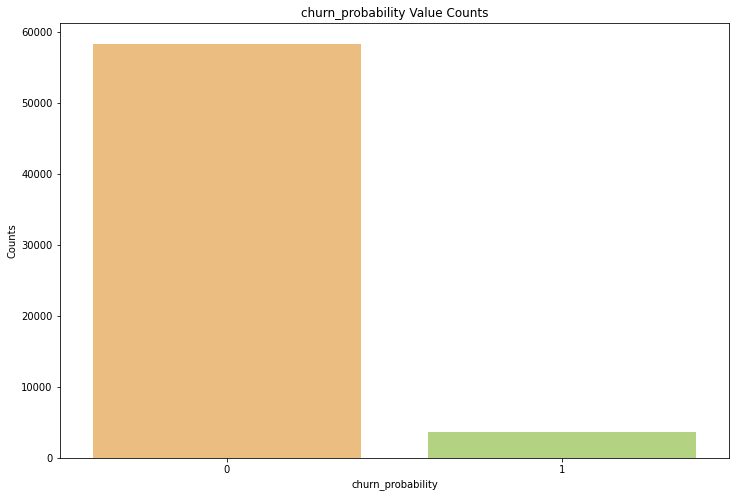

In [25]:
for col in colls:
    category_counts(col)

In [26]:
df.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,...,0,0,0,0,0,1958,0.0,0.0,0.0,0
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,...,1,0,0,0,0,710,0.0,0.0,0.0,0
2,2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,...,0,0,0,0,0,882,0.0,0.0,0.0,0
3,3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,...,0,0,0,0,0,982,0.0,0.0,0.0,0
4,4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,...,0,0,0,1,0,647,0.0,0.0,0.0,0


In [27]:
X = df.drop(['churn_probability','id'],axis=1)
y=df['churn_probability']

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)

In [29]:
scaler = StandardScaler()

In [30]:
normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)

In [31]:
normalized_x_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,-0.366467,-0.704611,-0.688557,-0.422846,-0.441626,-0.425644,-0.058685,-0.429430,-0.343880,-0.17456,...,-0.206771,-0.197346,-0.215926,-0.13222,-0.131564,-0.129667,2.061760,-0.263652,-0.255262,-0.236346
1,-0.043844,-0.027085,0.363402,-0.447459,-0.440980,-0.427161,-0.616720,-0.601751,-0.611337,-0.17456,...,2.554810,2.324838,4.918660,-0.13222,-0.131564,-0.129667,-0.695672,1.871514,1.217453,0.950968
2,0.335073,-0.218897,-0.867967,0.108294,-0.368781,-0.427161,1.196911,0.504840,-0.614767,-0.17456,...,-0.206771,-0.197346,-0.215926,-0.13222,-0.131564,-0.129667,-0.929353,-0.263652,-0.255262,-0.236346
3,-0.202895,-0.585606,-0.392506,-0.388259,-0.434355,-0.414271,-0.481939,-0.604053,-0.561646,-0.17456,...,-0.206771,-0.197346,-0.215926,-0.13222,-0.131564,-0.129667,-0.846266,-0.263652,-0.255262,-0.236346
4,0.119747,0.151212,0.285000,8.457772,5.422515,4.504149,-0.445055,-0.490370,-0.478675,-0.17456,...,-0.206771,-0.197346,-0.215926,-0.13222,-0.131564,-0.129667,-0.267777,-0.069546,0.253099,0.112962


In [32]:
normalized_x_test = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns)

In [33]:
def confusion_matrix_plot(matrix=None,classes=None,name='Logistic Regression'):
    plt.figure(figsize=(12,10))
    cmap = "YlGnBu"
    ax= plt.subplot()
    sns.heatmap(matrix, annot=True, fmt='g', ax=ax, cmap=cmap);  #annot=True to annotate cells, ftm='g' to disable scientific notation
    plt.savefig('/kaggle/working/img1.png')
    # labels, title and ticks
    ax.set_xlabel('Predicted labels',fontsize = 15,fontweight = 3);
    ax.set_ylabel('True labels',fontsize = 15,fontweight = 3); 
    ax.set_title('Confusion Matrix of '+name,fontsize = 25,fontweight = 5); 
    ax.xaxis.set_ticklabels(classes); 
    ax.yaxis.set_ticklabels(classes[::-1]);
    plt.show()

In [34]:
def cal_score(x_test=None,y_test=None,model=None,name=None):
    predictions = model.predict(x_test)
    labels=y_test
    matrix = confusion_matrix(predictions, labels)
    print(matrix)
    print('\n')

    f1 = f1_score(predictions, labels, average='weighted')
    print(f'F1 Score: {f1}')
    print('\n')
    classes=[False,True]
    print(classification_report(predictions, labels, labels=classes))
    
    confusion_matrix_plot(matrix = matrix,classes = classes,name = name)

[[17377  1029]
 [   90    73]]


F1 Score: 0.9613154912968694


              precision    recall  f1-score   support

       False       0.99      0.94      0.97     18406
        True       0.07      0.45      0.12       163

    accuracy                           0.94     18569
   macro avg       0.53      0.70      0.54     18569
weighted avg       0.99      0.94      0.96     18569



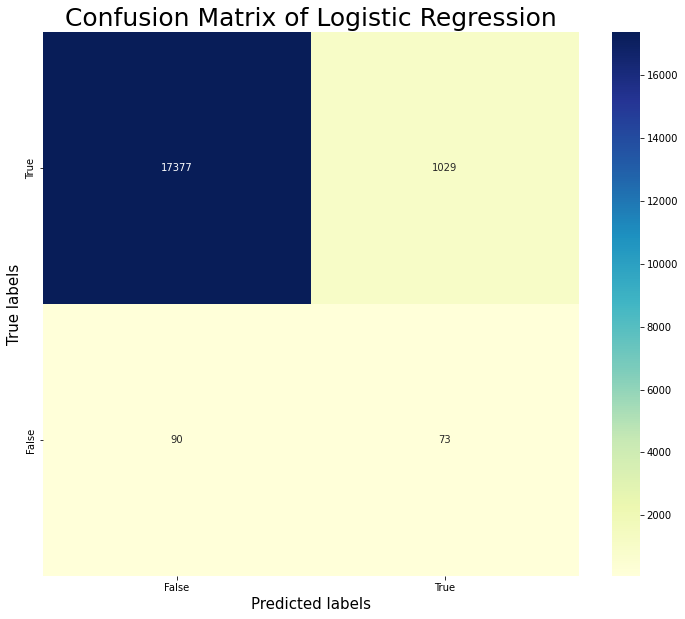

In [35]:
lr = LogisticRegression(max_iter=10000)
lr.fit(normalized_x_train,y_train)
cal_score(x_test=normalized_x_test,y_test=y_test,model=lr,name='Logistic Regression')

[[16640   689]
 [  827   413]]


F1 Score: 0.9161151283429001


              precision    recall  f1-score   support

       False       0.95      0.96      0.96     17329
        True       0.37      0.33      0.35      1240

    accuracy                           0.92     18569
   macro avg       0.66      0.65      0.65     18569
weighted avg       0.91      0.92      0.92     18569



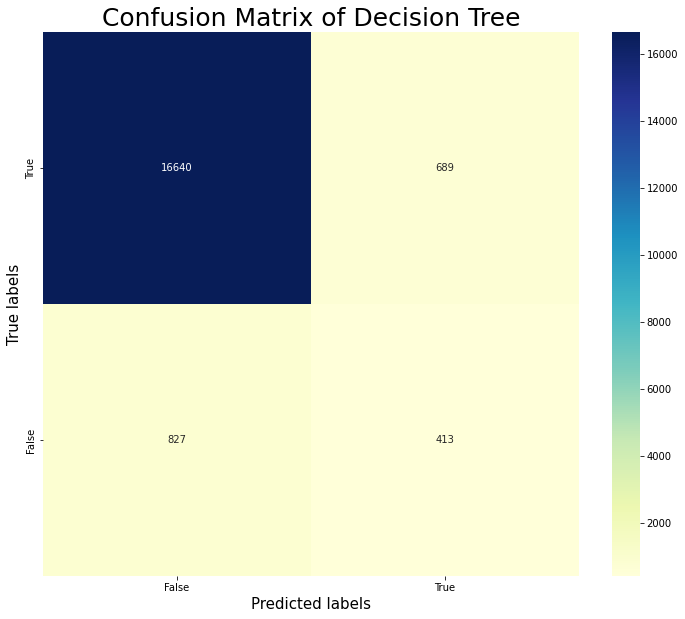

In [36]:
dr = DecisionTreeClassifier()
dr.fit(normalized_x_train,y_train)
cal_score(x_test=normalized_x_test,y_test=y_test,model=dr,name='Decision Tree')

[[17294   768]
 [  173   334]]


F1 Score: 0.9582696480049888


              precision    recall  f1-score   support

       False       0.99      0.96      0.97     18062
        True       0.30      0.66      0.42       507

    accuracy                           0.95     18569
   macro avg       0.65      0.81      0.69     18569
weighted avg       0.97      0.95      0.96     18569



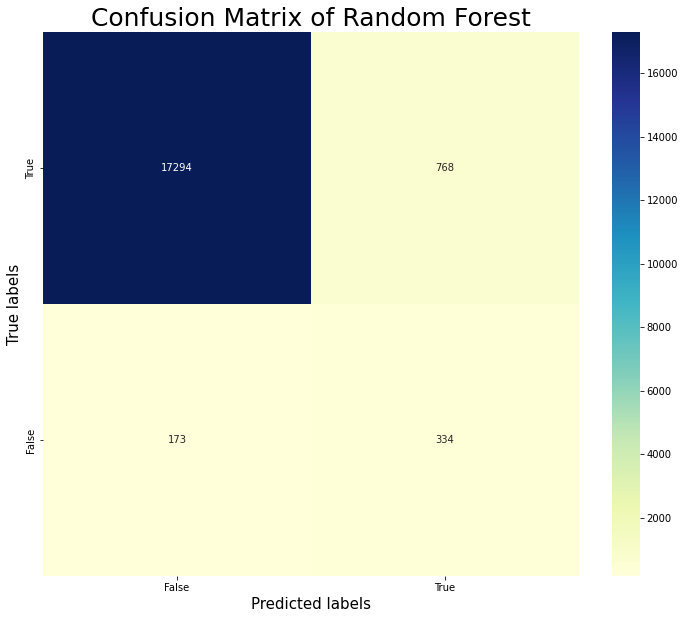

In [37]:
rf = RandomForestClassifier()
rf.fit(normalized_x_train,y_train)
cal_score(x_test=normalized_x_test,y_test=y_test,model=rf,name='Random Forest')

In [38]:
pd.DataFrame({
    'Feature':rf.feature_names_in_,
    'Importance':rf.feature_importances_}).sort_values(by='Importance',ascending=False)

,Feature,Importance
80,total_ic_mou_8,0.048303
59,loc_ic_t2m_mou_8,0.037516
65,loc_ic_mou_8,0.036696
14,roam_og_mou_8,0.030121
11,roam_ic_mou_8,0.029735
...,...,...
110,monthly_2g_8,0.000568
114,monthly_3g_6,0.000522
116,monthly_3g_8,0.000342
50,og_others_8,0.000132


In [39]:
test_df = pd.read_csv('../input/telecom-churn-case-study-hackathon-38/test (1).csv')

In [40]:
sol_df = pd.read_csv('../input/telecom-churn-case-study-hackathon-38/solution (1).csv')
dict_df = pd.read_csv('../input/telecom-churn-case-study-hackathon-38/data_dictionary.csv')


In [41]:
test_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [42]:
test_df.isnull().sum()

id                    0
circle_id             0
loc_og_t2o_mou      316
std_og_t2o_mou      316
loc_ic_t2o_mou      316
                  ...  
fb_user_8         22078
aon                   0
aug_vbc_3g            0
jul_vbc_3g            0
jun_vbc_3g            0
Length: 171, dtype: int64

In [43]:
a = test_df['id']

In [44]:
test_df = test_df[X.columns]

In [45]:
test_df.isnull().sum()

arpu_6            0
arpu_7            0
arpu_8            0
onnet_mou_6    1169
onnet_mou_7    1172
               ... 
sachet_3g_8       0
aon               0
aug_vbc_3g        0
jul_vbc_3g        0
jun_vbc_3g        0
Length: 124, dtype: int64

In [46]:
percent_null = test_df.isnull().sum().sum() / np.product(test_df.shape) * 100
percent_null

2.9148387096774195

In [47]:
for col in test_df.columns:
    null_col = test_df[col].isnull().sum() / test_df.shape[0] * 100
    print("{} : {:.2f}".format(col,null_col))

arpu_6 : 0.00
arpu_7 : 0.00
arpu_8 : 0.00
onnet_mou_6 : 3.90
onnet_mou_7 : 3.91
onnet_mou_8 : 5.58
offnet_mou_6 : 3.90
offnet_mou_7 : 3.91
offnet_mou_8 : 5.58
roam_ic_mou_6 : 3.90
roam_ic_mou_7 : 3.91
roam_ic_mou_8 : 5.58
roam_og_mou_6 : 3.90
roam_og_mou_7 : 3.91
roam_og_mou_8 : 5.58
loc_og_t2t_mou_6 : 3.90
loc_og_t2t_mou_7 : 3.91
loc_og_t2t_mou_8 : 5.58
loc_og_t2m_mou_6 : 3.90
loc_og_t2m_mou_7 : 3.91
loc_og_t2m_mou_8 : 5.58
loc_og_t2f_mou_6 : 3.90
loc_og_t2f_mou_7 : 3.91
loc_og_t2f_mou_8 : 5.58
loc_og_t2c_mou_6 : 3.90
loc_og_t2c_mou_7 : 3.91
loc_og_t2c_mou_8 : 5.58
loc_og_mou_6 : 3.90
loc_og_mou_7 : 3.91
loc_og_mou_8 : 5.58
std_og_t2t_mou_6 : 3.90
std_og_t2t_mou_7 : 3.91
std_og_t2t_mou_8 : 5.58
std_og_t2m_mou_6 : 3.90
std_og_t2m_mou_7 : 3.91
std_og_t2m_mou_8 : 5.58
std_og_t2f_mou_6 : 3.90
std_og_t2f_mou_7 : 3.91
std_og_t2f_mou_8 : 5.58
std_og_mou_6 : 3.90
std_og_mou_7 : 3.91
std_og_mou_8 : 5.58
isd_og_mou_6 : 3.90
isd_og_mou_7 : 3.91
isd_og_mou_8 : 5.58
spl_og_mou_6 : 3.90
spl_og_mou_

In [48]:
test_df['jun_vbc_3g'].mode()[0]

0.0

In [49]:
for col in test_df.columns:
    null_col = test_df[col].isnull().sum() / test_df.shape[0] * 100
    if null_col > 0:
        test_df[col] = test_df[col].fillna(test_df[col].mode()[0])

In [50]:
test_df.isnull().sum().sum()

0

In [51]:
final_normalized_x_test = pd.DataFrame(scaler.transform(test_df),columns = test_df.columns)

In [52]:
probabilities = rf.predict(final_normalized_x_test)

In [53]:
probabilities.shape

(30000,)

In [54]:
len(a)

30000

In [55]:
sol_df.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [56]:
submission = pd.DataFrame({'id':a,'churn_probability':probabilities})

In [57]:
submission.to_csv('Submission1.csv',index=False)

<a href="Submission1.csv"> Download Submission File </a>